# Bookshelfia Database Design

## 1. Database Schema, ERD, Table details and findings

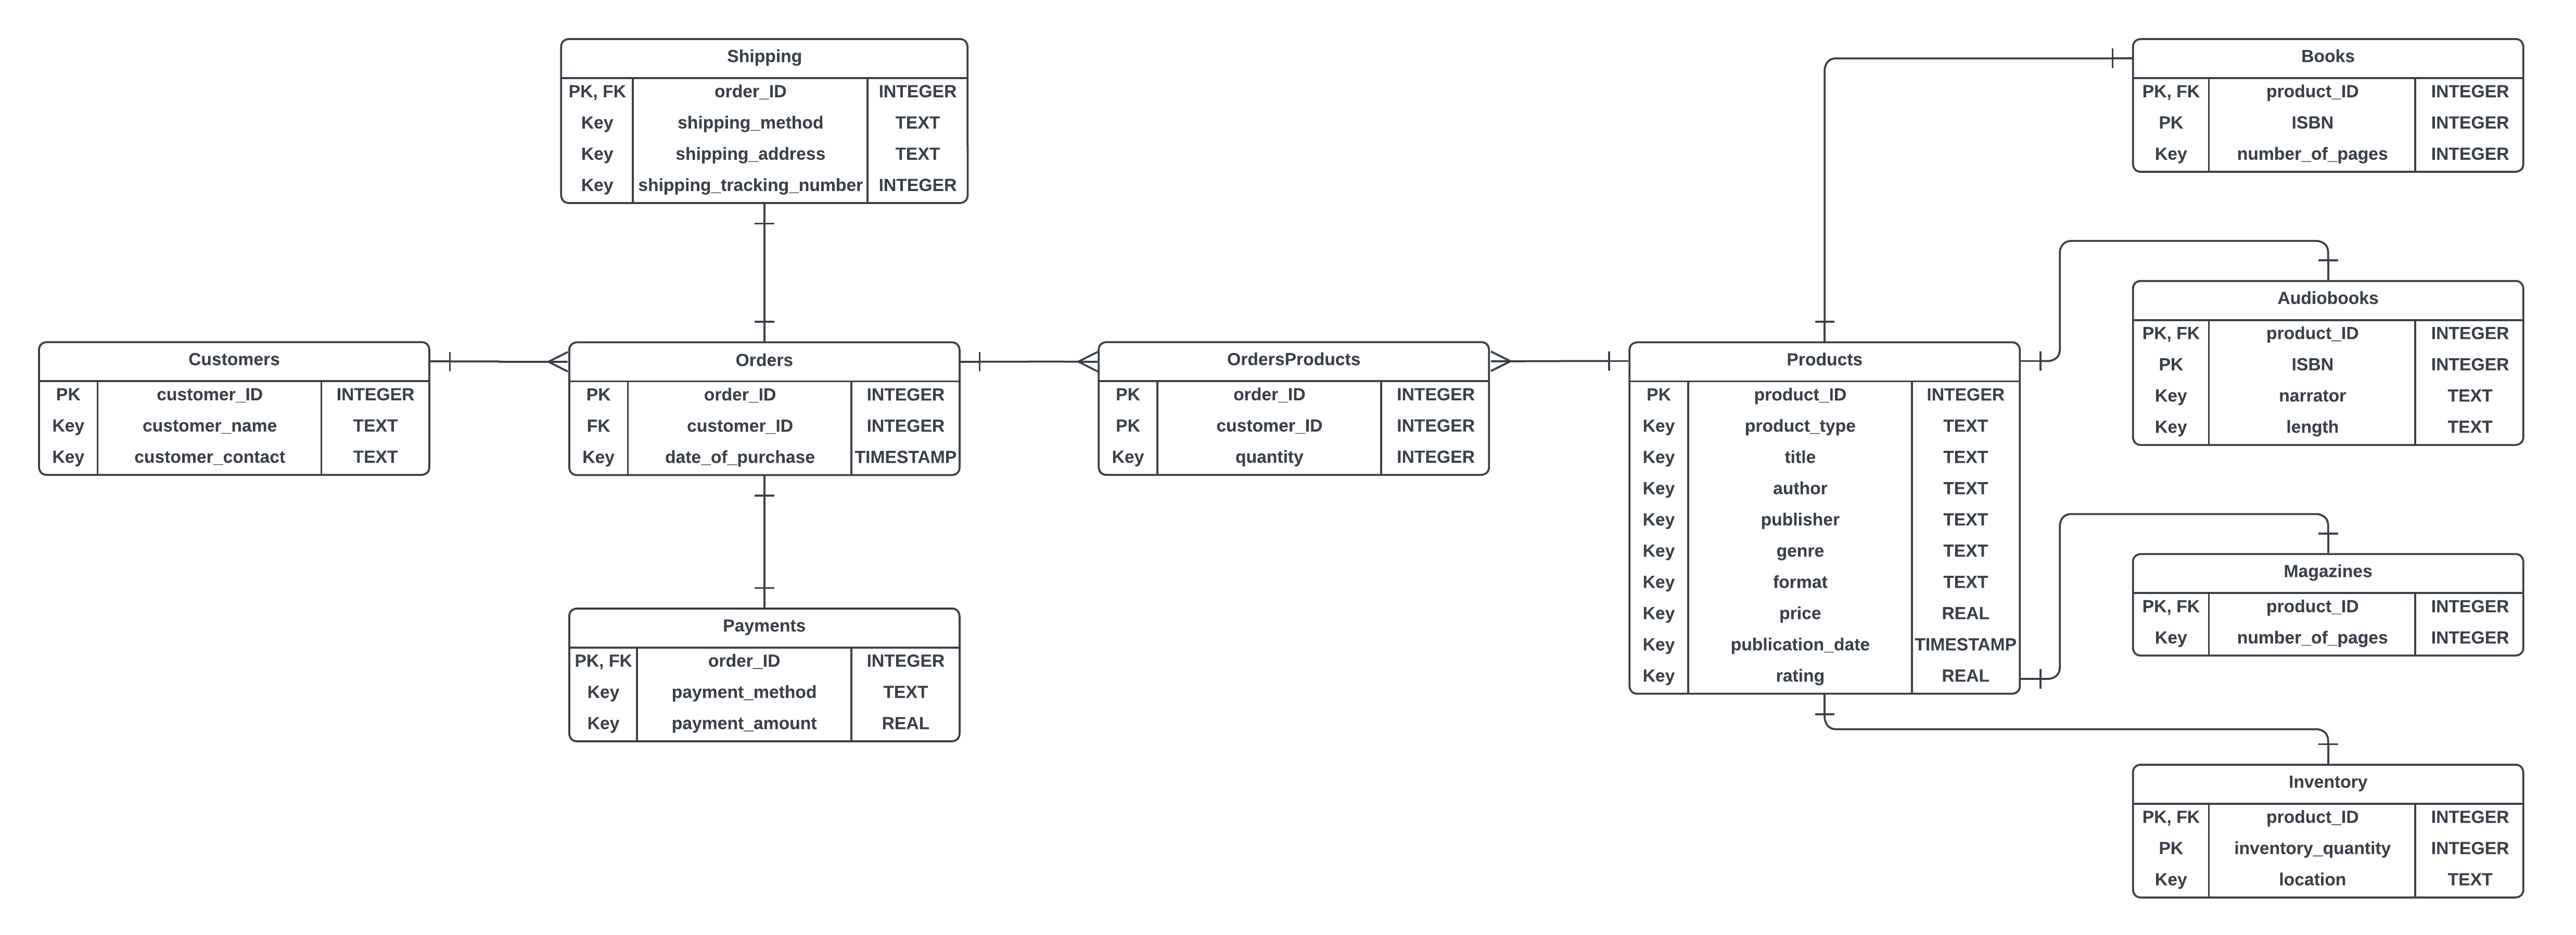

The above diagram shows the details of all the tables, their data, their primary and foreign keys and their relationships.

- An 'INTEGER' data type represents integers, a 'TEXT' datatype represents strings, a 'TIMESTAMP' datatype represents datetimes and a 'REAL' datatype represents floats.


- Moving from left to right, we find the Customers Table has a one-to-many relationship with the Orders Table. This is because a customer can place many orders but the orders can only be associated with one customer


- The Orders Table is linked to the Customers table as it uses customer_ID as a foreign key. It has a one-to-one relationship with both the Shipping and Payments Tables as each order is associated with its own Shipping and Payments details where the Shipping and Payments Tables use order_ID as both Primary and Foreign keys, establishing the one-to-one relationship


- There is a many-to-many relationship between Orders and Products as an order can contain many different products and a product can be a part of many different orders. In order to eliminate this many-to-many relationship, the OrdersProducts linking table was created which has a one-to-many relationship with the Orders Table and a many-to-one relationship with the Products Table. It uses both the order_ID and customer_ID fields to create a composite primary key


- As some fields only apply to certain product types e.g. narrator and length only applying to Audiobooks, it was necessary to create tables for each product type to avoid null values


- The Products Table has a one-to-one relationship with the Books, Audiobooks, Magazines and Inventory Tables as each product is either a Book, Audiobook or Magazine and has its own associated Inventory information. These Tables use product_ID as both Primary and Foreign keys, establishing the one-to-one relationship


*The ERD Diagram file can also be found in the included files in the submission*

## 2. Details of Data Generation and Normalisation Steps

<span style="color:red; font-weight:bold; font-size:15px;">
    - All the indiviual Tables can be found in the repo, along with the Database file, Normalisation steps workbook and iPYNB notebook

<span style="color:red; font-weight:bold; font-size:15px;">
    - Data has been generated using the Faker Python Package
</span>

<span style="color:red; font-weight:bold; font-size:15px;">
    - The data generated and queries performed are such that it assumes the current Month is June 2023
</span>

<span style="color:red; font-weight:bold; font-size:15px;">
- The best way I believed I could perform the normalisation steps and provide details of these is to do it within an Excel Worksheet called 'Normalisation steps'
</span>

## 3. SQL Scripts and logic

**NOTE: By default, the datatypes shown in the diagram of section 1 had been correctly inferred for all fields in all tables hence there was no need to manually assign datatypes**

In [1]:
#importing the libraries
import sqlite3
import os
import pandas as pd
import numpy as np

**1. Create the database tables and populate them with the data. Number of records may be determined by the database query requirements.**

In [2]:
# The individual tables shown in the ERD above are in the form of Excel Workbooks. The below lines of code reads each table
# into their respective dataframes

df_Audiobook = pd.read_excel('Audiobooks.xlsx')
df_Book = pd.read_excel('Books.xlsx')
df_Customer = pd.read_excel('Customers.xlsx')
df_Inventory = pd.read_excel('Inventory.xlsx')
df_Magazine = pd.read_excel('Magazines.xlsx')
df_Order = pd.read_excel('Orders.xlsx')
df_OrderProduct = pd.read_excel('OrdersProducts.xlsx')
df_Payment = pd.read_excel('Payments.xlsx')
df_Product = pd.read_excel('Products.xlsx')
df_Shipping = pd.read_excel('Shipping.xlsx')

In [3]:
# A function to connect to a database and add tables
def dftodb(df, tablename):
    
    # Opens a database connection to the Bookshelfia database and assigning it to the variable 'connection' creating a 
    # connection object
    connection = sqlite3.connect('Bookshelfia.db')
    
    # Writes the contents (i.e. records) of the dataframe, df, to a specified table 'tablename', through the connection
    # object, 'connection' which connects it to the Bookshelfia database. If a Table already exists, it will be replaced by 
    # the new Table and its values. The index is set to False so will not be included in the Table
    df.to_sql(name=tablename, con=connection, if_exists='replace', index=False)
    
    # .commit() method commits changes to the database 
    connection.commit()
    
    # closes the connection to the database 
    connection.close()
    
    return

In [4]:
# The below lines of code connects to the Bookshelfia

Bookshelfia_1 = dftodb(df_Audiobook,'Audiobooks')
Bookshelfia_2 = dftodb(df_Book,'Books')
Bookshelfia_3 = dftodb(df_Customer,'Customers')
Bookshelfia_4 = dftodb(df_Inventory,'Inventory')
Bookshelfia_5 = dftodb(df_Magazine,'Magazines')
Bookshelfia_6 = dftodb(df_Order,'Orders')
Bookshelfia_7 = dftodb(df_OrderProduct,'OrdersProducts')
Bookshelfia_8 = dftodb(df_Payment,'Payments')
Bookshelfia_9 = dftodb(df_Product,'Products')
Bookshelfia_10 = dftodb(df_Shipping,'Shipping')

In [5]:
# A function to execute a query
def query_func(query):
    
    # Opens a database connection to a particular database 'dbname' and assigning it to the variable 'conn' creating a 
    # connection object
    conn=sqlite3.connect('Bookshelfia.db')
    
    # Creates a cursor object 'cur' which interacts with the Bookshelfia database allowing for SQL queries to be executed 
    # and the results fetched
    cur=conn.cursor()
    
    # The query is executed using the cursor objects execute() method
    cur.execute(query)
    
    # Returns resulting rows from the executed query as a list of tuples
    items=cur.fetchall()
    
    # .commit() method commits changes to the Bookshelfia database
    conn.commit()
    
    # closes the connection to the database 'dbname'
    conn.close()
    
    return items

Olamaie, M. (2023) 'sql_practical3' [iPython Notebook], DSC5001M: Databases. York St John University. Available at: York St John Moodle

**2.	Write a query to retrieve the total number of books, magazines, and audiobooks in the database.**

In [6]:
# The design of the Bookshelfia Database is such that each entry in the Product Table's primary key field (product_ID) 
# corresponds to a unique book, magazine or audiobook. Therefore, a count of this field will answer the query

query = """
        SELECT COUNT(product_ID) 
        FROM Products
    """

# Returns resulting rows from the executed query as a list of tuples
items = query_func(query)

# prints every tuple (i.e. row) from the items list
for item in items:
    print(item)

(37,)


**3. Write a query to retrieve the titles of all books that are in a specific genre and have the highest rating**

In [7]:
# The genre chosen to demonstrate this query is the 'Mystery' genre. The following query selects the title from an inner 
# joined combination of the Products and Books Tables being joined on the product_ID field. This will return records when
# from both tables only if they have matching product_ID values. The Product Table of this inner joined combination is then
# filtered to where the genre is 'Mystery' and the rating is filtered to the maximum rating from the Product Table (prior to
# being joined) when filtered to 'Mystery' 

query = """
        SELECT Products.title
        FROM Products
        INNER JOIN Books ON Products.product_ID = Books.product_ID
        WHERE Products.genre = 'Mystery' 
        AND Products.rating = (SELECT MAX(rating) FROM Products WHERE Products.genre = 'Mystery')
        
    """

items=query_func(query)
for item in items:
    print(item)

('The Da Vinci Code',)


**4.	Write a query to retrieve the names and email addresses of all customers who have placed an order in the last month.**

In [8]:
# The following query selects the customer_name and customer_contact and date_of_purchase from an inner joined combination 
# of the Customers and Orders Tables being joined on the customer_ID field where the Order Table of this inner joined 
# combination is then filtered to where the Year and Month of the date_of_purchase field is equal to the Year and Month of 
# the current date minus the previous month. strftime was used to achieve this as it can extract the Year and Month from a 
# TIMESTAMP datatype. It is important to specify the Year and Month as opposed to just the Month as each year will have 
# the same months and all of the months from all years could be selected therefore Year has to be specified as it limits 
# the previous month to be only that of that particular year.

# While not required by the query, the date_of_purchase has been selected too to show that the logic of the query is working
# correctly and indeed we find that the date_of_purchase for customers is for the last month only

query = """
        SELECT Customers.customer_name, Customers.customer_contact, Orders.date_of_purchase
        FROM Customers
        INNER JOIN Orders ON Customers.customer_ID = Orders.customer_ID
        WHERE strftime('%Y-%m', Orders.date_of_purchase) = strftime('%Y-%m', date('now', '-1 month', 'localtime'))
    """
items=query_func(query)
for item in items:
    print(item)

('Sharon Young', 'sharonyoung@email.com', '2023-05-31 00:00:00')
('Tracey Reynolds', 'traceyreynolds@email.com', '2023-05-30 00:00:00')
('Peter Horton', 'peterhorton@email.com', '2023-05-29 00:00:00')
('Mr Cameron Haynes', 'cameronhaynes@email.com', '2023-05-28 00:00:00')
('Henry Morgan', 'henrymorgan@email.com', '2023-05-27 00:00:00')
('Donna Gough', 'donnagough@email.com', '2023-05-26 00:00:00')
('Thomas Pickering', 'thomaspickering@email.com', '2023-05-25 00:00:00')
('Timothy Howell', 'timothyhowell@email.com', '2023-05-24 00:00:00')
('Amber Kennedy', 'amberkennedy@email.com', '2023-05-23 00:00:00')
('Adrian Jones-Barton', 'adrianjonesbarton@email.com', '2023-05-22 00:00:00')
('Simon Wood', 'simonwood@email.com', '2023-05-21 00:00:00')
('Melissa Morgan-Owen', 'melissamorganowen@email.com', '2023-05-20 00:00:00')
('Thomas Reeves', 'thomasreeves@email.com', '2023-05-19 00:00:00')
('Robert Gill', 'robertgill@email.com', '2023-05-18 00:00:00')
('Tina Jones', 'tinajones@email.com', '2023

**5.	Write a query to retrieve the total revenue generated by the bookstore in the last quarter.**

In [9]:
# The revenue can be calculated as the sum of the payment_amount field from the Payments Table. In order to limit this to 
# dates within the last quarter, the Payments Table must be inner joined to the Orders table so that the date_of_purchase
# field from the Orders Table can be accessed. The current quarter is 2023 Q2. Therefore, the previous quarter will be 
# 2023 Q1 corresponding to all dates from Jan 2023 to March 2023.

query = """
        SELECT SUM(Payments.payment_amount)
        FROM Payments
        INNER JOIN Orders ON Payments.order_ID = Orders.order_ID
        WHERE date_of_purchase BETWEEN DATE('2023-01-01') AND DATE('2023-03-31')
    """
items=query_func(query)
for item in items:
    print(item)

(298.6900000000002,)


**6.	Write a query to retrieve the top 5 bestselling books of all time.**

In [10]:
# To get the quanity sold for a particular book, we have to group by the title from the Products Table and we need to 
# aggregate the sum of the quantity of the OrdersProducts Table. The OrdersProducts Table is inner joined with the Products
# Table on the product_ID fields for both Tables which in turn is inner joined with the Books table on the product_ID fields
# for both Tables as the query is for Books only NOT Audiobooks or Magazines. The Product Table of this inner joined 
# combination is grouped by the title and ordered by the sum of the quantity in descending order 
# with a limit of 5 to isolate the top 5 records as required in the query.

# While not required by the query, the sum of the quantity for each Book has been selected too to show that the logic of 
# the query is working correctly and indeed we find that the titles of the books and their quantities are in descending 
# order

query = """
        SELECT Products.title, SUM(OrdersProducts.quantity)
        FROM OrdersProducts
        INNER JOIN Products ON OrdersProducts.product_ID = Products.product_ID
        INNER JOIN Books ON Products.product_ID = Books.product_ID
        GROUP BY Products.title
        ORDER BY SUM(OrdersProducts.quantity) DESC
        LIMIT 5        
    """
items=query_func(query)
for item in items:
    print(item)

("Harry Potter and the Sorcerer's Stone", 52)
('The Great Gatsby', 7)
('To Kill a Mockingbird', 6)
('Pride and Prejudice', 4)
('The Lord of the Rings: The fellowship of the ring', 2)


**7.	Write a query to retrieve the names of customers who have purchased books from a particular author.**

In [11]:
# The author chosen to demonstrate this query is the 'J.R.R. Tolkien'. The following query selects the customer name, title 
# and author from an inner combination of the Customers, Orders, OrdersProducts, Products and Books Tables being joined on 
# appropriate keys as shown below. The Product Table of this inner joined combination is then filtered to where the author 
# is 'J.R.R. Tolkien'. While not required by the query, the title and author of the query have been selected too to show
# that the logic of the query is working correctly and indeed these customers have purchased books authored by 
# J.R.R. Tolkien

# While not required by the query, the title and author have been selected too to show that the logic of the query is 
# working correctly and indeed we find that these customers have purchased Books from 'J.R.R. Tolkien'

query = """
        SELECT customer_name, title, author
        FROM Customers
        INNER JOIN Orders ON Customers.customer_ID  = Orders.customer_ID 
        INNER JOIN OrdersProducts ON Orders.order_ID = OrdersProducts.order_ID        
        INNER JOIN Products ON OrdersProducts.product_ID = Products.product_ID
        INNER JOIN Books ON Products.product_ID = Books.product_ID
        WHERE Products.author = 'J.R.R. Tolkien'   
        
    """

items=query_func(query)
for item in items:
    print(item)

('Timothy Howell', 'The Hobbit', 'J.R.R. Tolkien')
('Aimee Bennett', 'The Lord of the Rings: The fellowship of the ring', 'J.R.R. Tolkien')
('Marilyn Charlton', 'The Lord of the Rings: The fellowship of the ring', 'J.R.R. Tolkien')


**8.	Write a query to retrieve the names of all customers who have purchased at least one book, one magazine, and one audiobook.**

**9.	Write a query to retrieve the names of all customers who have not made a purchase in the last 6 months.**

In [12]:
# This query selects the customer name and the date of purchase in DD-MM-YYYY format from an inner joined combination of
# Customers and Orders being inner joined on the customer_ID key. A WHERE clause states the condition that
# the customer names should NOT be names of customers which have purchased between 6 months ago and now. Therefore, the
# names that do get returned are of those customers who have not purchased in the last 6 months answering the query.

# While not required by the query, the date_of_purchase has been selected too to show that the logic of the query is working
# correctly and indeed we find that the date_of_purchase for these customers is prior to 6 months ago


query = """
        SELECT Customers.customer_name, strftime('%d-%m-%Y', Orders.date_of_purchase)
        FROM Customers
        INNER JOIN Orders ON Customers.customer_ID = Orders.customer_ID      
        WHERE Customers.customer_name NOT IN (SELECT customer_name FROM Customers 
        INNER JOIN Orders ON Customers.customer_ID = Orders.customer_ID
        WHERE Orders.date_of_purchase BETWEEN DATE('now', '-6 month','localtime') AND DATE('now', 'localtime'))
    """

items=query_func(query)
for item in items:
    print(item)

('Marilyn Roberts', '30-10-2022')
('Kelly Ward', '25-10-2022')
('Gavin Day', '19-10-2022')
('Tracy Lord', '17-10-2022')
('Francesca Hope', '14-10-2022')
('Elizabeth Myers-Harris', '09-10-2022')
('Holly Hughes', '05-10-2022')
('Kelly Barnett', '04-10-2022')
('Charlotte Spencer', '30-09-2022')
('Kyle Jones', '27-09-2022')
('Mathew Richardson', '23-09-2022')
('Holly Kent', '20-09-2022')
('Philip Rhodes', '17-09-2022')
('Raymond Parry', '11-09-2022')
('Linda Holden', '09-09-2022')
('Kieran Singh', '06-09-2022')
('Amelia Harper', '01-09-2022')
('Olivia Manning', '29-08-2022')
('Allan Davies', '26-08-2022')
('Hannah Johnson', '23-08-2022')
('Maria Fleming', '20-08-2022')
('Stanley Riley-Roberts', '15-08-2022')
('June Shah', '12-08-2022')
('Elliot Wong', '07-08-2022')
('Shaheen Shah', '04-08-2022')
('Krish Patel', '03-08-2022')


**10.	Write a query to retrieve the titles of all audiobooks that are narrated by a particular narrator.**

In [13]:
# The narrator chosen to demonstrate this query is the 'Eckhart Tolle'. The following query selects the title and narrator 
# from an inner join combination of the Products and Audiobooks Tables being joined on the common product_ID key. The 
# Audiobooks Table of this inner joined combination is then filtered to where the author is narrator is 'Eckhart Tolle'.

# While not required by the query, the narrator has also been selected too to show that the logic of the query is working
# correctly and we find that Eckhart Tolle is the narrator for these title


query = """
        SELECT Products.title, Audiobooks.narrator
        FROM Products
        INNER JOIN Audiobooks ON Products.product_ID = Audiobooks.product_ID
        WHERE Audiobooks.narrator = 'Eckhart Tolle'
    """
items=query_func(query)
for item in items:
    print(item)

('The Power of Now', 'Eckhart Tolle')
("A New Earth: Awakening to Your Life's Purpose", 'Eckhart Tolle')
('Practicing the Power of Now', 'Eckhart Tolle')


**11.	Write a query to retrieve the top 10 most popular genres based on the total number of books, magazines, and audiobooks sold.**

In [14]:
# To answer this query, we must aggregate the sum of the quantity after grouping by genre therefore genre and SUM(quantity) 
# are selected. The quantity is given by the OrdersProducts Table and genre by the Products table therefore an inner join
# between the two Tables has been specified on the common 'product_ID' key. The joined table is then grouped by genre and
# it is ordered by aggregated sum of the quantity for that genre in descending order. The records that get returned have
# been limited to 10 and the top 10 genres can now be identified

# While not required by the query, the SUM(quantity) has also been selected too to show that the logic of the query is 
# working correctly and we find that the genres of the products and their corresponding quantities are in descending order 


query = """
        SELECT genre, SUM(quantity)
        FROM OrdersProducts
        INNER JOIN Products 
        ON OrdersProducts.product_ID = Products.product_ID
        GROUP BY genre
        ORDER BY SUM(quantity) DESC
        LIMIT 10        
    """
items=query_func(query)
for item in items:
    print(item)

('Fantasy', 61)
('Classic', 18)
('Self-Help', 6)
('Spirituality', 5)
('Mystery', 3)
('Science and Nature', 2)
('Romance', 2)
('News and Politics', 2)
('Fiction', 2)
('Dystopian', 2)


**12.	Write a query to retrieve the total number of distinct customers who have purchased books published by a particular publisher.**

In [15]:
# The publisher chosen to demonstrate this query is the 'Wordsworth Editions'. To get the total number of distinct customers
# we must select a count of distinct customer ID's where a unique customer ID represents a customer. The following query 
# selects the count of distinct customer ID's and the publisher from an inner combination of the Customers, Orders, 
# OrdersProducts, Products and Books Tables being joined on appropriate keys as shown below. The Product Table of this inner
# joined combination is then filtered to where the publisher is 'Wordsworth Editions'


query = """
        SELECT COUNT(DISTINCT Customers.customer_ID), Products.publisher
        FROM Customers
        INNER JOIN Orders ON Customers.customer_ID = Orders.customer_ID
        INNER JOIN OrdersProducts ON Orders.order_ID = OrdersProducts.order_ID
        INNER JOIN Products ON OrdersProducts.product_ID = Products.product_ID
        INNER JOIN Books ON Products.product_ID = Books.product_ID       
        WHERE Products.publisher = 'Wordsworth Editions'
           
    """
items=query_func(query)
for item in items:
    print(item)

(7, 'Wordsworth Editions')


**13.	Write a query to retrieve the titles of all books that have been ordered by more than 50 customers.**

In [16]:
# The following query selects the title from an inner joined combination of the Customers, Orders, OrdersProducts, Products
# and Books which have been grouped by the product_ID. The HAVING clause has been added after the GROUP BY and filters 
# for rows where the count of distinct customers (via customer_ID) is greater than 50. HAVING has been used instead of WHERE
# as the HAVING clause works on aggregated data (after the GROUP BY) and the WHERE clause does not

# While not required by the query, the COUNT(Customers.customer_ID) has also been selected too to show that the logic of the
# query is working correctly and we find that only the titles of those books who have been ordered by over 50 unique 
# customers have been selected

query = """
        SELECT title, COUNT(Customers.customer_ID)
        FROM Customers
        INNER JOIN Orders ON Customers.customer_ID = Orders.customer_ID
        INNER JOIN OrdersProducts ON Orders.order_ID = OrdersProducts.order_ID
        INNER JOIN Products ON OrdersProducts.product_ID = Products.product_ID
        INNER JOIN Books ON Products.product_ID = Books.product_ID  
        GROUP BY Products.product_ID
        HAVING COUNT(DISTINCT Customers.customer_ID) > 50
        
           
    """
items=query_func(query)
for item in items:
    print(item)

("Harry Potter and the Sorcerer's Stone", 52)


**14.	Write a query to retrieve the names of all customers who have spent more than the average order amount.**

In [17]:
# The following query retrieves selected the distinct customer names, payment amount, and average payment amount from an 
# inner joined combination of the Customers, Orders and Payments Tables joined on the appropriate keys and filtered where 
# the payment amount is greater than the average payment amount. 

# The payment amount for these customers and the average amount have also been included in the SELECT statement to
# verify that it is these customers whose payment amounts are higher than the average payment amount

query = """
        SELECT DISTINCT customer_name, Payments.payment_amount, (SELECT AVG(payment_amount) FROM Payments)
        FROM Customers
        INNER JOIN Orders ON Customers.customer_ID = Orders.customer_ID
        INNER JOIN Payments ON Orders.order_ID = Payments.order_ID
        WHERE Payments.payment_amount > (SELECT AVG(payment_amount) FROM Payments)
 
    """
items=query_func(query)
for item in items:
    print(item)

('Sharon Young', 21.770000000000003, 7.057029702970302)
('Tracey Reynolds', 21.57, 7.057029702970302)
('Peter Horton', 42.93, 7.057029702970302)
('Mr Cameron Haynes', 14.23, 7.057029702970302)
('Henry Morgan', 12.99, 7.057029702970302)
('Donna Gough', 10.99, 7.057029702970302)
('Timothy Howell', 13.39, 7.057029702970302)
('Simon Wood', 8.99, 7.057029702970302)
('Melissa Morgan-Owen', 12.29, 7.057029702970302)
('Robert Gill', 7.75, 7.057029702970302)
('Louise Burton', 7.59, 7.057029702970302)
('Maurice Lee', 7.59, 7.057029702970302)
('Alexander Miles', 11.99, 7.057029702970302)
('Mohamed Armstrong', 11.49, 7.057029702970302)
('Alexander Smith', 13.99, 7.057029702970302)
('Thomas West', 19.99, 7.057029702970302)
('Ian Phillips-Henderson', 7.99, 7.057029702970302)
('Carole Barrett', 7.59, 7.057029702970302)
('Sian Richardson', 7.99, 7.057029702970302)
('Damian Coates', 15.99, 7.057029702970302)
('Robert Saunders', 7.99, 7.057029702970302)
('Aimee Bennett', 7.79, 7.057029702970302)
('Sian 

**15.	Write a query to retrieve the titles of all books that have never been ordered by any customer.**

In [18]:
# The query selects the title from a combination of the OrdersProducts and Products Tables joined by a right join which in 
# turn has been innr joined to the Books Table. This will return records from the right table, Products, 
# and the matched records from the left table, OrdersProducts. For books that have never been ordered by a customer, 
# there should be no orders that contain books with these product ID's (i.e. the product_ID and order_ID of the 
# OrdersProducts Table should be NULL for these books). Applying this condition in the where clause will 
# allow the titles of all books that have never been ordered by any customer to be retrieved

# While not required by the query, the order_ID and product_ID from the OrdersProducts Tables have also been selected too 
# to show that the logic of the query is working correctly and we find that the order_ID and product_ID for these books 
# are NULL therefore these books have never been ordered

query = """
        SELECT Products.title, OrdersProducts.order_ID, OrdersProducts.product_ID 
        FROM OrdersProducts
        RIGHT JOIN Products
        ON Products.product_ID = OrdersProducts.product_ID
        INNER JOIN Books
        ON Products.product_ID = Books.product_ID
        WHERE OrdersProducts.order_ID IS NULL AND OrdersProducts.product_ID IS NULL
 
    """
items=query_func(query)
for item in items:
    print(item)

('The Hunger Games', None, None)
('The Lion, the Witch and the Wardrobe', None, None)
('The Fault in Our Stars', None, None)
